# Reading & understanding the data

Supress the warnings

In [129]:
import warnings 
warnings.filterwarnings('ignore')

In [130]:
## importing the libraries

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score




In [132]:
bikesharing = pd.read_csv('day.csv')

In [133]:
bikesharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [134]:
# check the shape
bikesharing.shape

(730, 16)

In [135]:
# checking the datafrom for null and data type
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [136]:
#check the statistics of the data 
bikesharing.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [137]:
# check the columns of the data
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [138]:
##checking the data types of data 
bikesharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [139]:
## checking the dimensions if the data
bikesharing.ndim

2

In [140]:
## checking the axes of the data 
bikesharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [141]:
## checking for the null values in column data
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [142]:
## Findings
-Dataset has  730 rows and 16 columns 
- There are no null values in the dataset in either of the columns

SyntaxError: invalid syntax (4253664628.py, line 2)

# Cleaning the Data

In [143]:
bikesharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [144]:
## as we see the column names are not proper , so we rename the columns 
bikesharing.rename(columns={'yr': 'year','hum':'humidity','mnth': 'month'},inplace=True)

In [145]:
bikesharing.head()

instant      dteday  season  year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Dropping the unncessary columns 
- Instant column not required
- dteday not required as we have the day details 
- casual column not required
- registered column not required


In [146]:
## dropping these 4 columns
bikesharing.drop(['instant','dteday','casual','registered'],axis =1, inplace=True)

In [147]:
## checking teh data set again
bikesharing.head()

season  year  month  holiday  weekday  workingday  weathersit       temp  \
0       1     0      1        0        1           1           2  14.110847   
1       1     0      1        0        2           1           2  14.902598   
2       1     0      1        0        3           1           1   8.050924   
3       1     0      1        0        4           1           1   8.200000   
4       1     0      1        0        5           1           1   9.305237   

      atemp  humidity  windspeed   cnt  
0  18.18125   80.5833  10.749882   985  
1  17.68695   69.6087  16.652113   801  
2   9.47025   43.7273  16.636703  1349  
3  10.60610   59.0435  10.739832  1562  
4  11.46350   43.6957  12.522300  1600

In [148]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [149]:
##next we encrypt or rather map  the columns season, month , weekday 
bikesharing.season=bikesharing.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bikesharing.month=bikesharing.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikesharing.weekday=bikesharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikesharing.weathersit = bikesharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [150]:
bikesharing.weathersit.value_counts()

Clear             463
Misty             246
Light_snowrain     21
Name: weathersit, dtype: int64

In [151]:
bikesharing.corr()

year   holiday  workingday      temp     atemp  humidity  \
year        1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
humidity   -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed       cnt  
year        -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.002453 -0.027640  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
humidity    -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000

In [152]:
## Handling missing values
bikesharing.isnull().sum()


season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64

In [153]:
## there are no missing values to be imputed


# Visualisation of data


<Figure size 1500x3000 with 0 Axes>

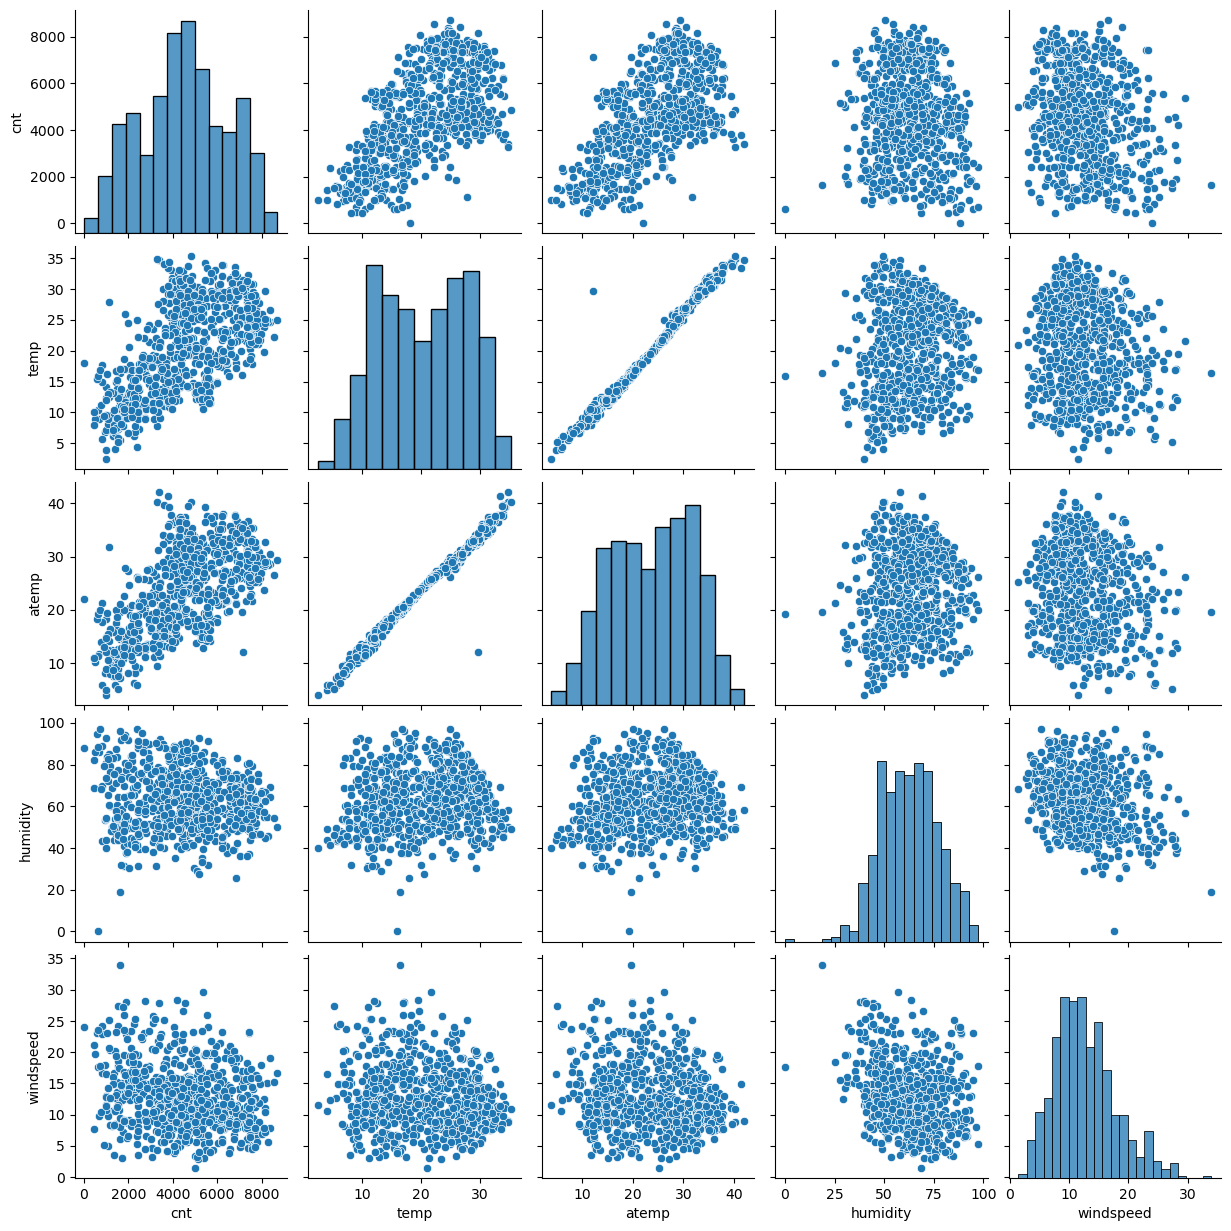

In [154]:
## the categorical columns needs to nbe analysed with resp[ect to the target variable , so we use pair plot 
plt.figure(figsize= (15,30))
sns.pairplot(data=bikesharing,vars =['cnt','temp','atemp','humidity','windspeed'])
plt.show()


In [155]:
## findings from the graph
- Atemp and temp have a highest correlation with the target variable cnt


SyntaxError: invalid syntax (3494587347.py, line 2)

In [ ]:
## defining function to create barplot for categorical columns
def plotting_cat_columns(column):
    plt.figure(figsize =(12,6))
    plt.subplot(1,2,1)
    sns.barplot(column, 'cnt',data =bikesharing)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data =bikesharing,hue ='year',palette ='Set1')
    plt.legend(labels=['2018','2019'])
    plt.show()

In [ ]:
plotting_cat_columns('season')

In [ ]:
## Findings from the graph
- In Fall season , the bookings was more 
- in year 2018 and 2019 , fall season only the booking count was more


In [ ]:
plotting_cat_columns('month')

In [ ]:
## Findings from the graph
-- the maximum no. of bookings are in month of  may, June , July , aug , sep and oct . 
-- in 2018 , the max was in jun and in 2019 the max was in sept 


In [ ]:
## next we visualise the booking in the week day or weekend
plotting_cat_columns('weekday')

In [ ]:
## Findings from the graph
-- as compared to weekdays , on weekends the bookings of the bikes are more
-- also, In 2019 , more bikes are booked as compared to 2018

In [ ]:
plotting_cat_columns('weathersit')

In [ ]:
## Findings from the graph
-- when the weather is clear , the bookings are more and in case of low snowrain it is less. 
--in year 2019 the bookings were more in clear weather and even in 2018 and 2019 least amount of bookings were in light snowrain

In [ ]:
## visualisation of bookings for holidays
plotting_cat_columns('holiday')

In [ ]:
## Findings from the graph
-- as per the finidngs, looks like more number of poeple book the bikes in holidays only.

In [ ]:
## finding the relationship between cnt and temp
plt.title("Cnt vs temp", fontsize=16)
sns.regplot(data =bikesharing,x='temp', y='cnt')
plt.show()

In [ ]:
## findings from the graph-
- as per the findings , the demand for the bikes are incresing as the temperature is increasing
-there is a linear relation 

In [ ]:
## finding the relationship between cnt and Humidity
plt.title("Cnt vs Humidity", fontsize=16)
sns.regplot(data =bikesharing,x='humidity', y='cnt')
plt.show()

In [156]:
## Findings from the graph
- humidity increases the demand for bikes decreases
- negative relation
- more points are scattered around


SyntaxError: invalid syntax (3015764107.py, line 2)

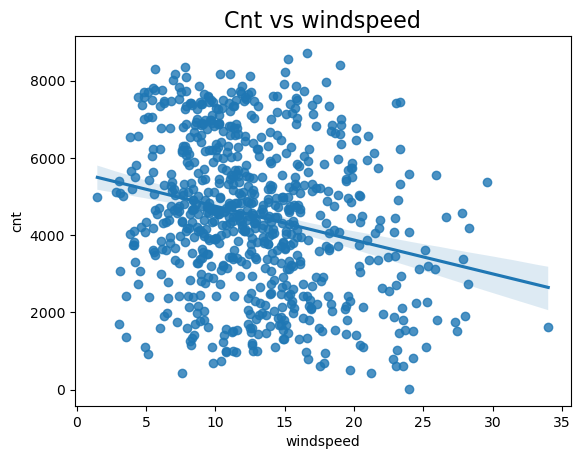

In [157]:
## finding the relationship between cnt and windspeed
plt.title("Cnt vs windspeed", fontsize=16)
sns.regplot(data =bikesharing,x='windspeed',y='cnt')
plt.show()

In [158]:
## findings from the graph
- more values are seen scattered in the graph
windspeed increases and demand bikes decreases

SyntaxError: invalid syntax (331577300.py, line 2)

In [159]:
## finding the coorelation between the variables
sns.heatmap(bikesharing[['temp','atemp','humidity','windspeed','cnt']].corr(),cmap ='BuGn', annot =True)

<AxesSubplot:>

In [160]:
## findings from the graph
-- as mentioned earlier also , atemp and temp has a highest coorelation
-there is negative coorealtion between windspeed and count


SyntaxError: invalid syntax (379874361.py, line 2)

In [161]:
corr = bikesharing.corr()


<AxesSubplot:>

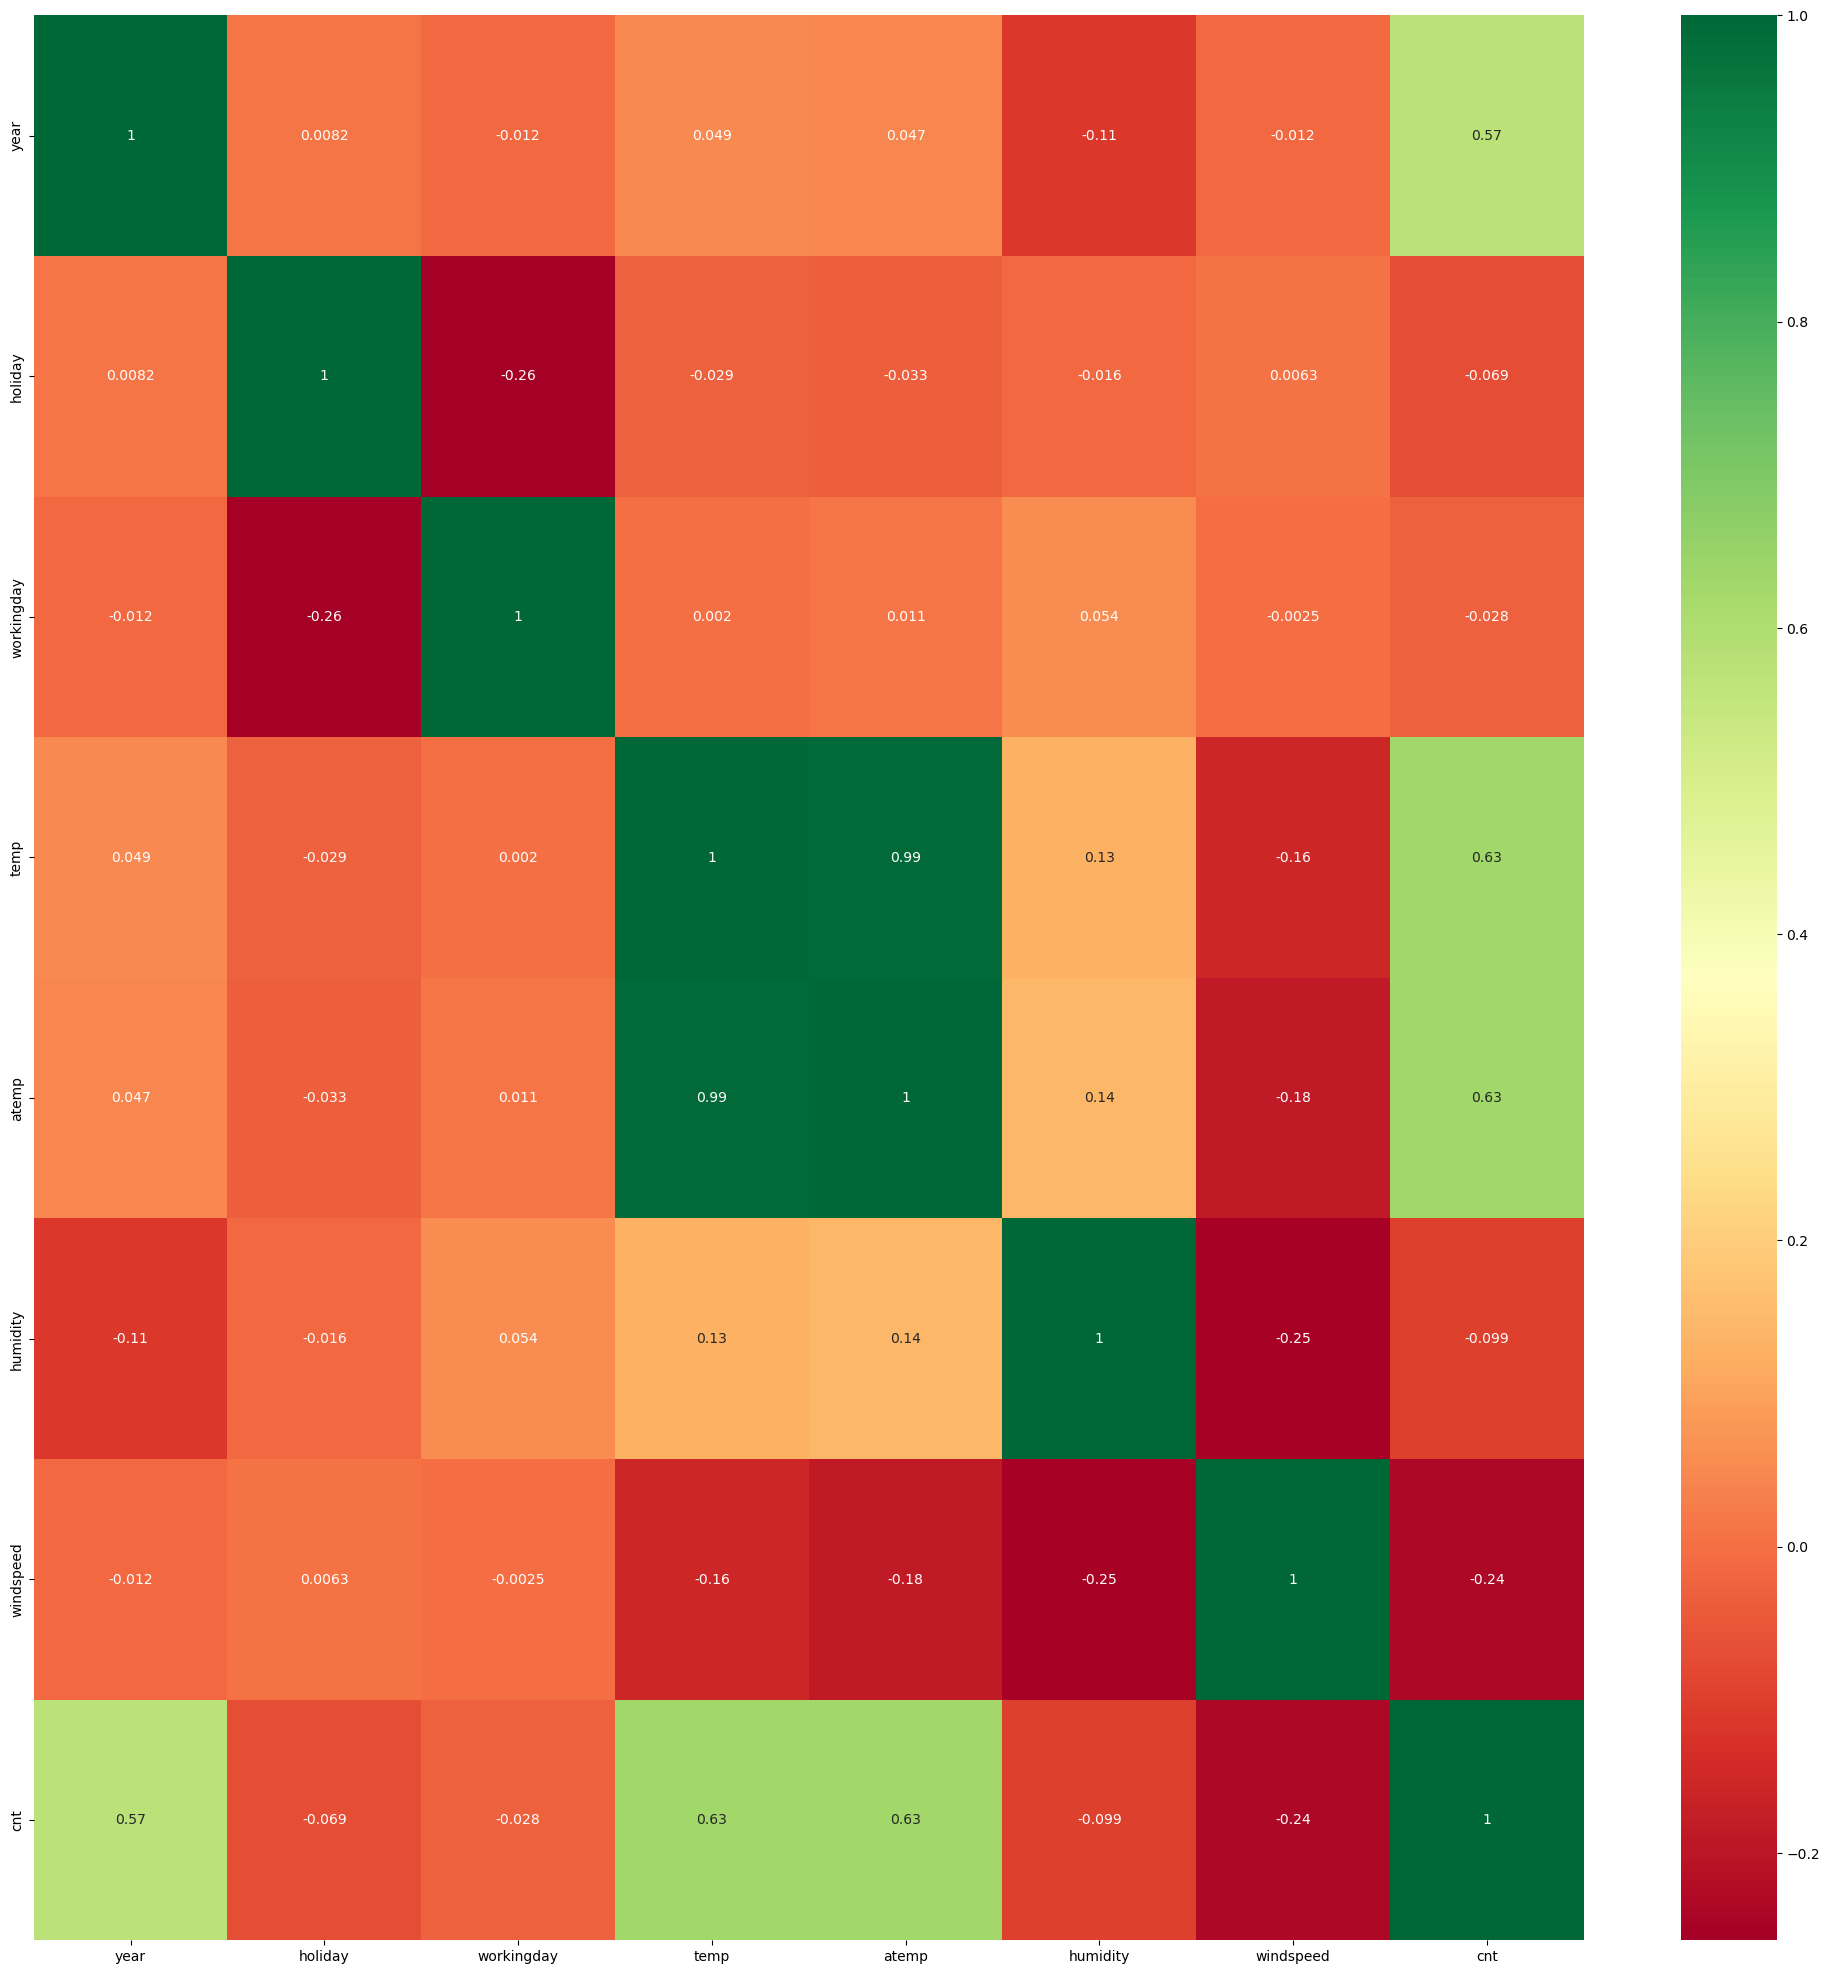

In [162]:
##heatmap of correlation
plt.figure(figsize=(25,25))
corr=bikesharing.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')

In [163]:
## Findings from the graph 
--Atemp and temp has the highest correlation.

SyntaxError: invalid syntax (638934684.py, line 2)

# Preparation of data for linear Regression

In [164]:
## creating dummy variables for months , weekdays , weathersit and seasons
month_df=pd.get_dummies(bikesharing.month,drop_first=True)
weekday_df=pd.get_dummies(bikesharing.weekday,drop_first =True)
weathersit_df=pd.get_dummies(bikesharing.weathersit,drop_first =True)
seasons_df =pd.get_dummies(bikesharing.season,drop_first=True)


In [165]:
## after creatinmg the dummy variables , let us merge the data frames with dummy variable dataset
bikesharing_new=pd.concat([bikesharing,month_df,weekday_df,weathersit_df,seasons_df],axis =1)

In [166]:
bikesharing_new.head()

season  year month  holiday weekday  workingday weathersit       temp  \
0  spring     0   jan        0     mon           1      Misty  14.110847   
1  spring     0   jan        0     tue           1      Misty  14.902598   
2  spring     0   jan        0     wed           1      Clear   8.050924   
3  spring     0   jan        0     thu           1      Clear   8.200000   
4  spring     0   jan        0     fri           1      Clear   9.305237   

      atemp  humidity  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
0  18.18125   80.5833  ...    0    0    0    0    0               0      1   
1  17.68695   69.6087  ...    0    0    0    1    0               0      1   
2   9.47025   43.7273  ...    0    0    0    0    1               0      0   
3  10.60610   59.0435  ...    0    0    1    0    0               0      0   
4  11.46350   43.6957  ...    0    0    0    0    0               0      0   

   spring  summer  winter  
0       1       0       0  
1       1       0       0  
2       1       0       0  
3       1       0       0  
4       1       0       0  

[5 rows x 34 columns]

In [167]:
bikesharing_new.shape

(730, 34)

In [168]:
bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  jul             730 non-null    uint8  
 17  jun             730 non-null    uin

In [169]:
## now that we have the dummy variable data set , we can drop the columns month, season, weekday, weathersit
bikesharing_new.drop(['season','month', 'weekday','weathersit'],axis = 1,inplace = True)

In [170]:
## checking teh head of new data frame
bikesharing_new.head()

year  holiday  workingday       temp     atemp  humidity  windspeed   cnt  \
0     0        0           1  14.110847  18.18125   80.5833  10.749882   985   
1     0        0           1  14.902598  17.68695   69.6087  16.652113   801   
2     0        0           1   8.050924   9.47025   43.7273  16.636703  1349   
3     0        0           1   8.200000  10.60610   59.0435  10.739832  1562   
4     0        0           1   9.305237  11.46350   43.6957  12.522300  1600   

   aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
0    0    0  ...    0    0    0    0    0               0      1       1   
1    0    0  ...    0    0    0    1    0               0      1       1   
2    0    0  ...    0    0    0    0    1               0      0       1   
3    0    0  ...    0    0    1    0    0               0      0       1   
4    0    0  ...    0    0    0    0    0               0      0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 30 columns]

In [171]:
## checking shape of new data frame
bikesharing_new.shape

(730, 30)

In [172]:
## column info of the new data frame
bikesharing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  jul             730 non-null    uint8  
 13  jun             730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Splitting the data into train and test data set

In [173]:
## splitting the data set
np.random.seed(0)
bikesharing_train,bikesharing_test=train_test_split(bikesharing_new, train_size=0.7,random_state =100)


In [174]:
## checking teh training data set
bikesharing_train.shape

(510, 30)

In [175]:
## checking teh testing data set
bikesharing_test.shape

(220, 30)

In [176]:
## using minmax scaler for scaling functions

scaler = MinMaxScaler()

In [177]:
## training data set before scaling
bikesharing_train.head()

year  holiday  workingday       temp    atemp  humidity  windspeed   cnt  \
576     1        0           1  29.246653  33.1448   70.4167  11.083475  7216   
426     1        0           0  16.980847  20.6746   62.1250  10.792293  4066   
728     1        0           1  10.489153  11.5850   48.3333  23.500518  1796   
482     1        0           0  15.443347  18.8752   48.9583   8.708325  4220   
111     0        0           0  13.803347  16.0977   72.9583  14.707907  1683   

     aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  spring  \
576    0    0  ...    0    0    0    0    1               0      0       0   
426    0    0  ...    0    1    0    0    0               0      1       1   
728    0    1  ...    0    0    0    0    0               0      0       1   
482    0    0  ...    0    1    0    0    0               0      1       0   
111    0    0  ...    0    1    0    0    0               0      1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 30 columns]

In [178]:
numerical_vars = ['temp','atemp','humidity','windspeed','cnt']
bikesharing_train[numerical_vars] = scaler.fit_transform(bikesharing_train[numerical_vars])

In [179]:
## training data set after scaling
bikesharing_train.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
576     1        0           1  0.815169  0.766351  0.725633   0.264686   
426     1        0           0  0.442393  0.438975  0.640189   0.255342   
728     1        0           1  0.245101  0.200348  0.498067   0.663106   
482     1        0           0  0.395666  0.391735  0.504508   0.188475   
111     0        0           0  0.345824  0.318819  0.751824   0.380981   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
576  0.827658    0    0  ...    0    0    0    0    1               0      0   
426  0.465255    0    0  ...    0    1    0    0    0               0      1   
728  0.204096    0    1  ...    0    0    0    0    0               0      0   
482  0.482973    0    0  ...    0    1    0    0    0               0      1   
111  0.191095    0    0  ...    0    1    0    0    0               0      1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 30 columns]

In [180]:
## training data set describing
bikesharing_train.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.513156    0.650480   
std      0.500429    0.157763    0.453386    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542596    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec  ...         sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.096078    0.084314  ...    0.129412   
std      0.169803    0.224421    0.294988    0.278131  ...    0.335985   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  510.000000  510.000000  510.000000  510.000000      510.000000   
mean     0.137255    0.143137    0.152941    0.135294        0.029412   
std      0.344454    0.350557    0.360284    0.342373        0.169124   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.345098    0.243137    0.247059    0.247059  
std      0.475867    0.429398    0.431725    0.431725  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

<AxesSubplot:>

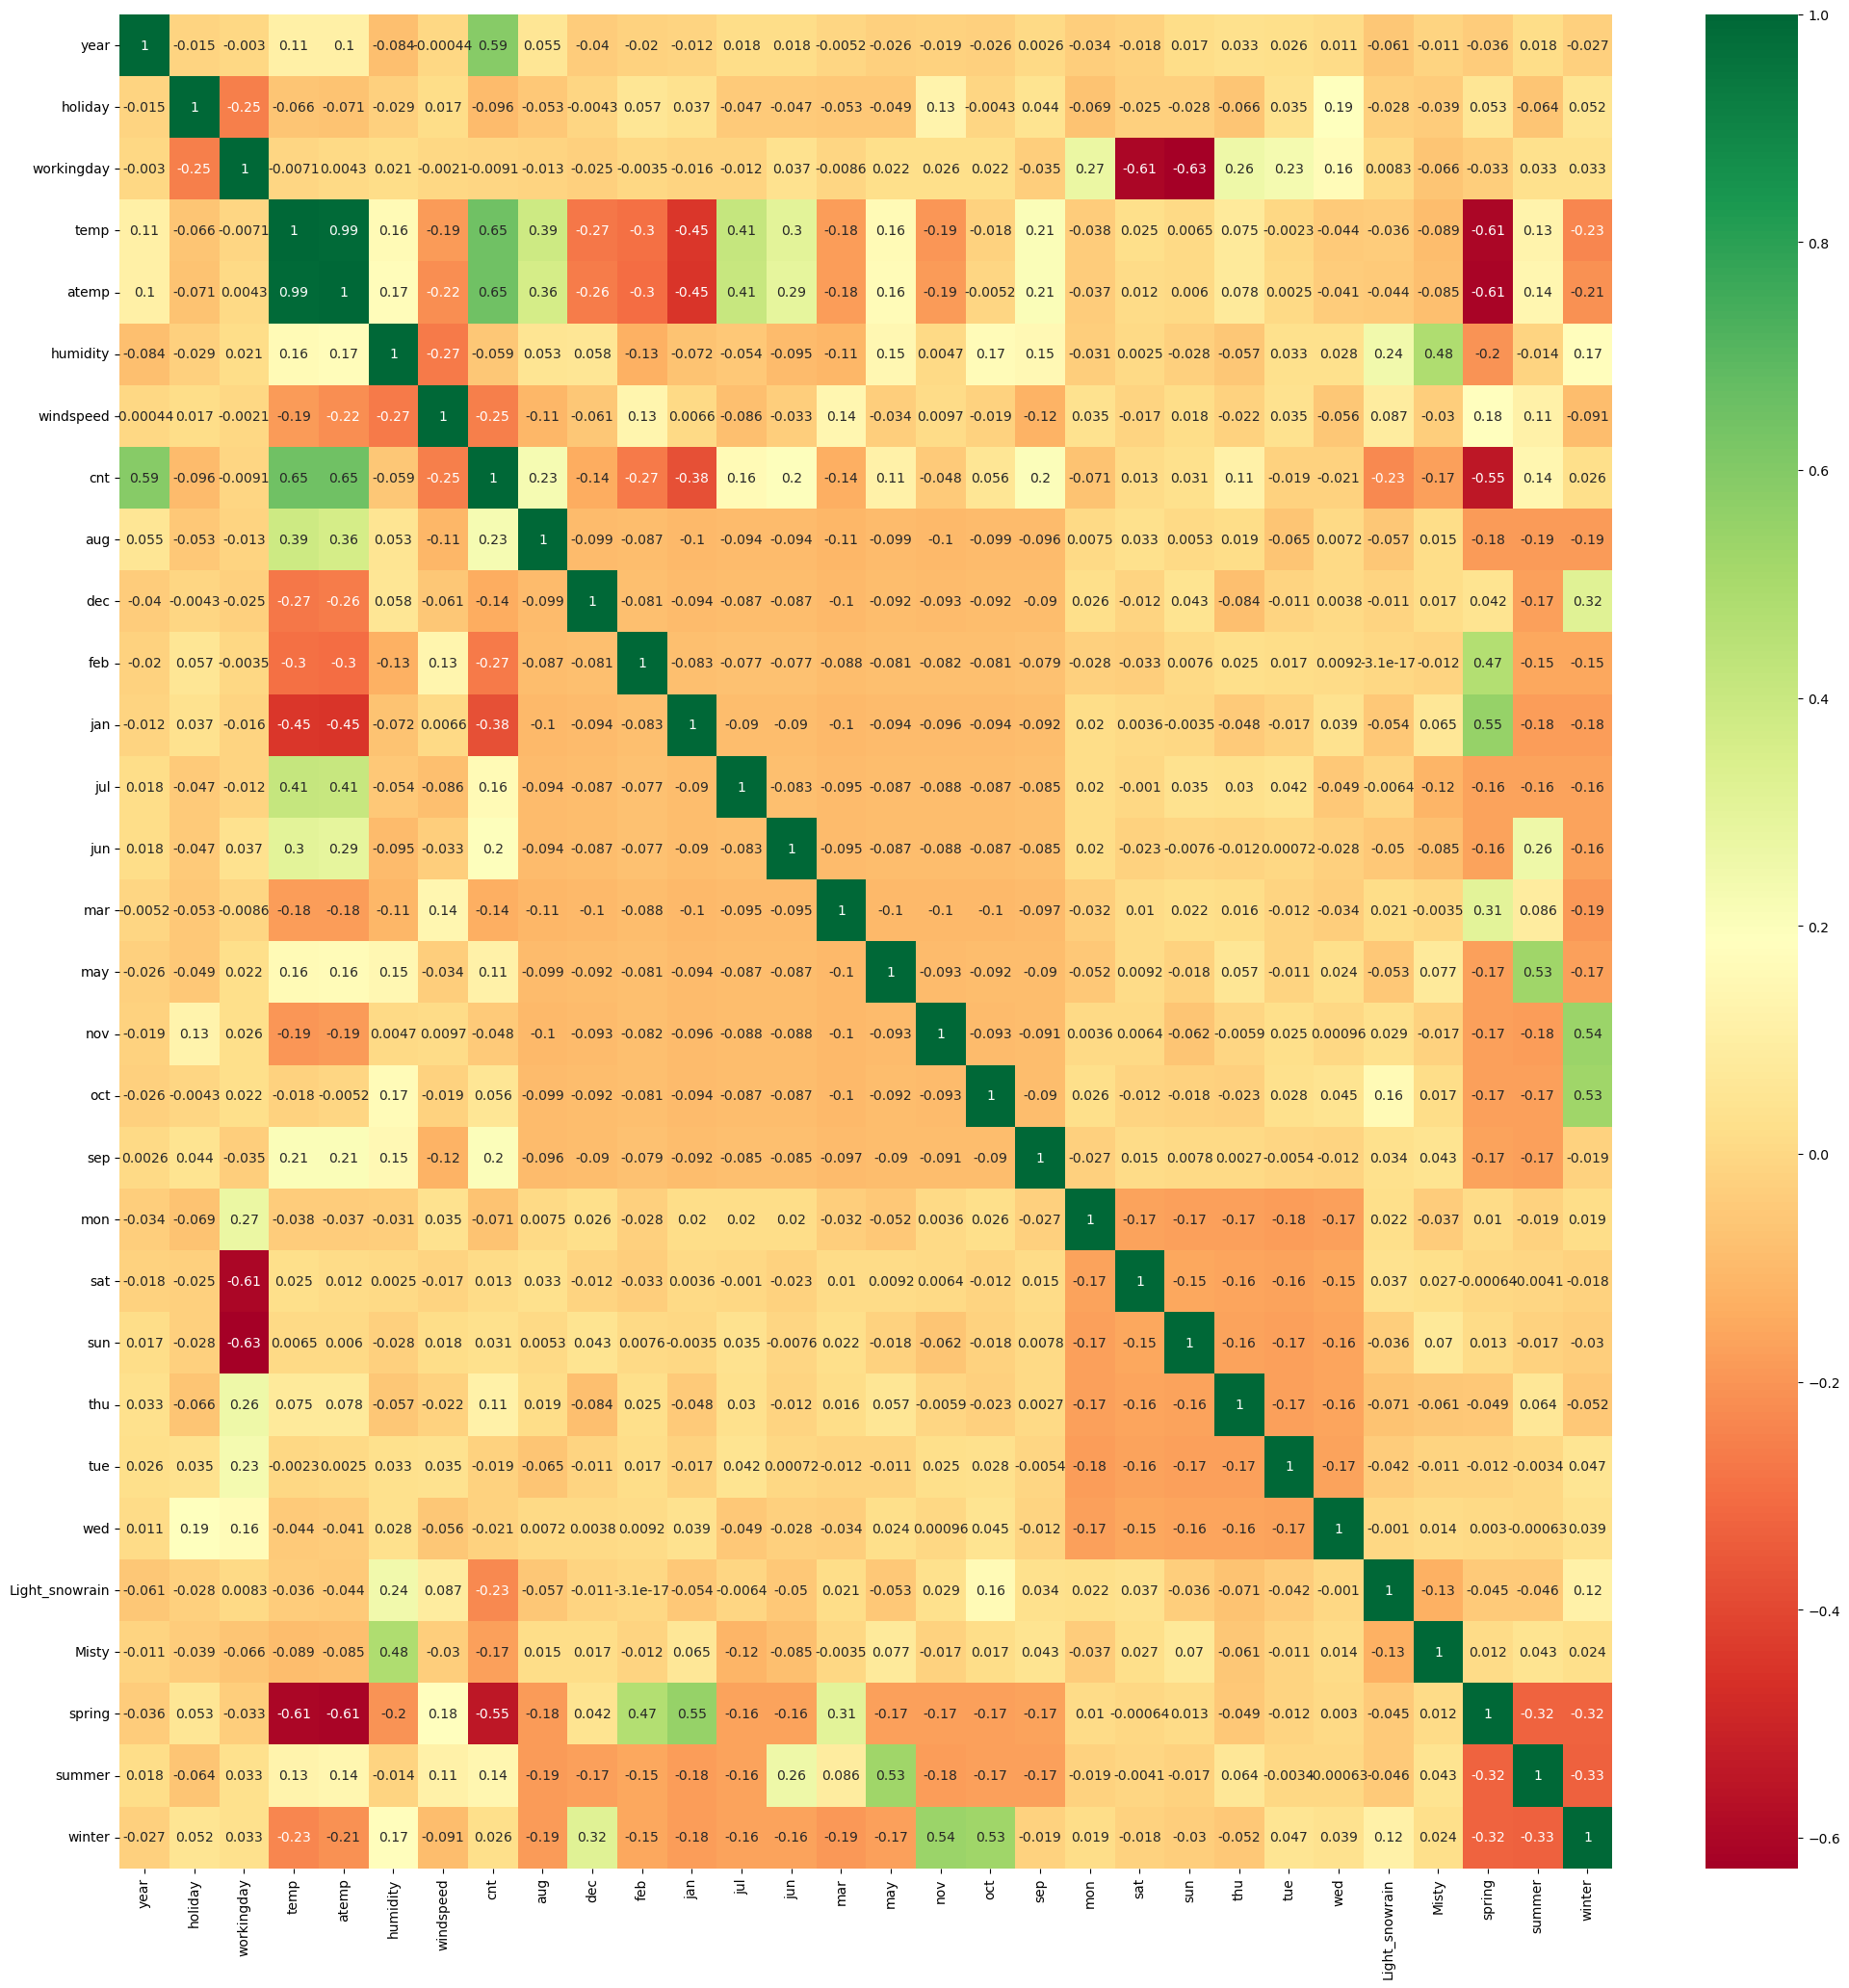

In [181]:
plt.figure(figsize=(25,25))
corr=bikesharing_train.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')

In [182]:
## Findings from the graph of training data set
--Count has a coorelation with year variable and temp
- Misty and the humidity has correlation.
- The season spring with Jan and Feb , Summer with May and winter with oct and nov has good coorelation


SyntaxError: invalid syntax (971928978.py, line 2)

In [ ]:
## check the relation of temp with cnt
plt.scatter(x='temp', y ='cnt', data =bikesharing_train)

In [ ]:
## findings from the graph
there is a positive coorelation between the temp and cnt


In [ ]:
## lets start building a linear model
y_train =bikesharing_train.pop('cnt')
X_train=bikesharing_train


In [ ]:
lm= LinearRegression()
lm.fit(X_train,y_train)




In [ ]:
## importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [ ]:
## next is the list of columns in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
## checking which all columns are getting rejected
X_train.columns[~rfe.support_]

In [ ]:
## VIF value calculation 

def calculationVIF(bikesharing):
    vif =pd.DataFrame()
    vif['Features'] = bikesharing.columns
    vif['VIF'] =[variance_inflation_factor(bikesharing.values,i )for i in range(bikesharing.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif=vif.sort_values(by ='VIF',ascending =False)
    return vif
    
     

In [ ]:
## checking the data frame with selected variables
X_train_rfe=X_train[col]

In [ ]:
## Now, here we are calculating VIF 
calculationVIF(X_train_rfe)

In [ ]:
## findings from the table 
- Humidity shows the highest VIF value
- Holiday shows the least VIF value


# 1st linear regression model

In [ ]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1=sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())


In [ ]:
## Humidity has very high VIF value, so lets drop the humidity column
X_train_new=X_train_rfe.drop(['humidity'], axis=1)

## again we calculate the VIF 
calculationVIF(X_train_new)

# VIF value is good , we can try to still reduce it
## building second linear regression model


In [183]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):          1.47e-186
Time:                        15:09:24   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

In [184]:
## as per the model P value for Nov is high so we can drop the column
X_train_new=X_train_new.drop(['nov'], axis=1)

KeyError: "['nov'] not found in axis"

In [ ]:
## calculation of new VIF
calculationVIF(X_train_new)

## as we see from the table , after dropping the columns also, there is no significant change in the VIF values. 

In [ ]:
## building the 3rd linear regression model
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3=sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())


In [ ]:
## as we see from the table dec P value is high so we can drop the column
X_train_new=X_train_new.drop(['dec'], axis=1)
## calculate the VIF value
calculationVIF(X_train_new)

In [ ]:
## after droping lets observe the model
X_train_lm_4= sm.add_constant(X_train_new)
lr_4=sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())


In [ ]:
## from the findings we can drop Jan column as it has high P value

X_train_new=X_train_new.drop(['jan'], axis=1)
## calculate the VIF value
calculationVIF(X_train_new)

In [ ]:
## calculate the VIF value
calculationVIF(X_train_new)

In [ ]:
## after droping lets observe the model
X_train_lm_5= sm.add_constant(X_train_new)
lr_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

In [ ]:
## from the findings we can drop Jul column as it has high P value

X_train_new=X_train_new.drop(['jul'], axis=1)
## calculate the VIF value
calculationVIF(X_train_new)

In [ ]:
## 6th linear regression model building
X_train_lm_6= sm.add_constant(X_train_new)
lr_6=sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

In [ ]:
## this model looks appropriate , findings are
-- F-Statistics value - 248.4
-- the multicollinearity seems to be low
-- p values for all the predictors looks significant


In [ ]:
## next we need to check the parameters and the coeffecients
lr_6.params

In [ ]:
## Next Step is the Residual analysis of the train data 
X_train_lm_6

In [ ]:
y_train_pred = lr_6.predict(X_train_lm_6)


In [ ]:
## Normality of the error terms
fig =plt.figure()
sns.distplot((y_train-y_train_pred),bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
## error terms are following normal distribution 


In [ ]:
## next we plot a heatmap for x_train_new
plt.figure(figsize=(10,15))
sns.heatmap(X_train_new.corr(),annot =True, cmap = 'RdYlGn')

In [185]:
## findings from the graph-
there is no multicolinearlity as seen

SyntaxError: invalid syntax (243331132.py, line 2)

In [186]:
## checking teh VIF value 
calculationVIF(X_train_new)

Features   VIF
3       windspeed  4.60
2            temp  3.84
0            year  2.07
7          spring  1.99
8          summer  1.90
9          winter  1.63
6           Misty  1.55
4             sep  1.23
5  Light_snowrain  1.08
1         holiday  1.04

In [187]:
## all the values of VIF are less than 5 which is good


In [188]:
## Homoscedasticity

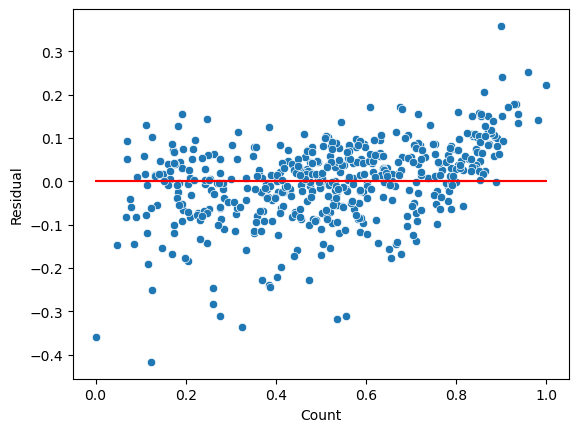

In [189]:
y_train_pred=lr_6.predict(X_train_lm_6)
residual =y_train-y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train-y_train),'-r')

plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [190]:
## Findings - No pattern is observed from the plot for residuals

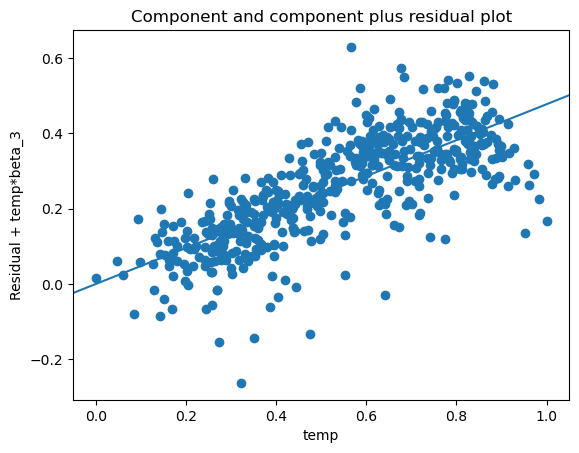

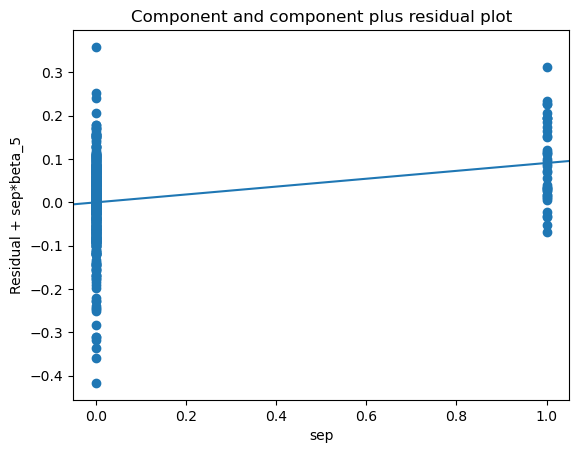

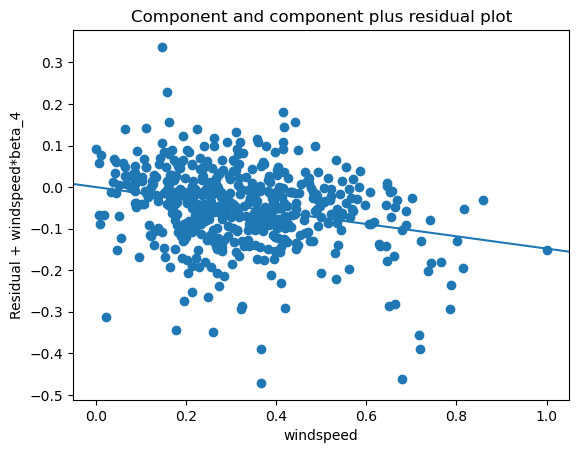

In [191]:
# next we validate the linear relationship by using CCPR plot
# Components and component plus residual plot
sm.graphics.plot_ccpr(lr_6,'temp')
plt.show()
sm.graphics.plot_ccpr(lr_6,'sep')
plt.show()
sm.graphics.plot_ccpr(lr_6,'windspeed')
plt.show()



In [192]:
## in all the 3 graphs we get the linearity

# Predictions as per the newly created model

In [193]:
## now we make the predictions based on the newly created model no. 6th 
numerical_vars = ['temp','atemp','humidity','windspeed','cnt']
bikesharing_test[numerical_vars] = scaler.fit_transform(bikesharing_test[numerical_vars])
bikesharing_test.head()

year  holiday  workingday      temp     atemp  humidity  windspeed  \
184     0        1           0  0.837241  0.778767  0.534223   0.149393   
535     1        0           1  0.911423  0.855132  0.470417   0.231142   
299     0        0           0  0.496221  0.492359  0.777843   0.443398   
221     0        0           1  0.890387  0.805661  0.236659   0.449707   
152     0        0           0  0.821739  0.749249  0.070765   0.682387   

          cnt  aug  dec  ...  sat  sun  thu  tue  wed  Light_snowrain  Misty  \
184  0.704300    0    0  ...    0    0    0    0    1               0      1   
535  0.725421    0    0  ...    0    0    1    0    0               0      0   
299  0.278853    0    0  ...    1    0    0    0    0               0      1   
221  0.545512    1    0  ...    0    0    0    0    0               0      0   
152  0.569148    0    0  ...    1    0    0    0    0               0      0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 30 columns]

In [194]:
bikesharing_test.describe()

year     holiday  workingday        temp       atemp    humidity  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.546074    0.530791    0.508362   
std      0.500809    0.187620    0.480828    0.248645    0.227648    0.200875   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.329310    0.333953    0.361079   
50%      0.000000    0.000000    1.000000    0.545492    0.543153    0.491299   
75%      1.000000    0.000000    1.000000    0.756414    0.719758    0.650989   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt         aug         dec  ...         sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.418803    0.517923    0.059091    0.086364  ...    0.172727   
std      0.187683    0.239498    0.236333    0.281541  ...    0.378873   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.284201    0.361045    0.000000    0.000000  ...    0.000000   
50%      0.403318    0.520681    0.000000    0.000000  ...    0.000000   
75%      0.523975    0.687956    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              sun         thu         tue         wed  Light_snowrain  \
count  220.000000  220.000000  220.000000  220.000000      220.000000   
mean     0.154545    0.140909    0.122727    0.159091        0.027273   
std      0.362295    0.348721    0.328872    0.366595        0.163248   
min      0.000000    0.000000    0.000000    0.000000        0.000000   
25%      0.000000    0.000000    0.000000    0.000000        0.000000   
50%      0.000000    0.000000    0.000000    0.000000        0.000000   
75%      0.000000    0.000000    0.000000    0.000000        0.000000   
max      1.000000    1.000000    1.000000    1.000000        1.000000   

            Misty      spring      summer      winter  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.318182    0.254545    0.263636    0.236364  
std      0.466833    0.436599    0.441609    0.425817  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [195]:
y_test = bikesharing_test.pop('cnt')
X_test = bikesharing_test

In [196]:
col1=X_train_new.columns

X_test =X_test[col1]

## adding constant variable to test data frame
X_test_lm_6=sm.add_constant(X_test)

In [197]:
y_pred =lr_6.predict(X_test_lm_6)

In [198]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7935

# Evaluating the model

In [199]:
## now that we have made all the models lets evaluate 
-- we find the graph between actual and predicted values


SyntaxError: invalid syntax (365660936.py, line 2)

Text(0, 0.5, 'y_pred')

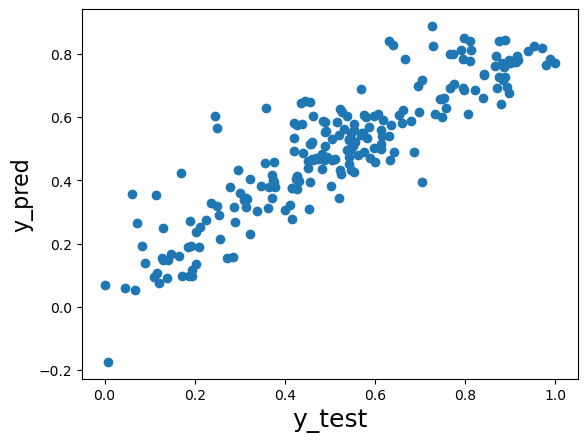

In [200]:

plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [201]:
round(lr_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [125]:
## calculating the adjusted R2 value
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7836


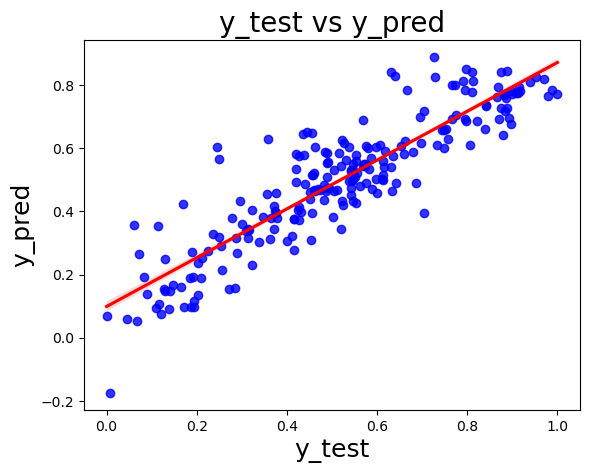

In [202]:
# Visualise the fit on the test data
# Regression Plot

plt.figure()
sns.regplot(x=y_test,y=y_pred,ci=68,fit_reg=True, scatter_kws ={'color':'blue'}, line_kws= {'color': 'red'})
plt.title('y_test vs y_pred',fontsize =20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_pred',fontsize =18)
plt.show()

## Comparing between Test and training data Set
     - Train dataset R^2          : 0.833
     - Test dataset R^2           : 0.7935
     - Train dataset Adjusted R^2 : 0.829   
     - Test dataset Adjusted R^2  : 0.7836
        


In [127]:
## Findings
-- Temperature - the coefficient 0.4777 indicates that when the temperature increases the demand of bikes increases
---year - The coeffecient 0.2341 indicates that a unit increase in year variable increases the bike numbers by 0.2341 units.
---September month- the coeffecient 0.0910 indicates that a unit increase in sep  variable increases the bike numbers by 0.0910 units.
--windspeed - the coeffecient -0.1481 indicates that a unit increase in windspeed would decreases the demand of bikes
---Demand of bikes will decrease in  Light_snowrain, Misty, spring. 



SyntaxError: invalid syntax (1154115838.py, line 2)